# Execution Orders

- First of all, it is important to know that there is an order of execution of clauses in SQL.
- SQL does not execute clauses in the same order as we code them.
- In this exercise, I have to answer the questions below  while using MySQL queries on DBeaver  to retrieve required information from 2 datasets. One is about  movies and one is about directors. The difficulty level will gradually increase with the number of question.

https://www.sisense.com/blog/sql-query-order-of-operations/

# The requests

1. All columns of the directors table when the director has the first name "Steven".

In [ ]:
SELECT * FROM directors
WHERE name LIKE "Steven%";

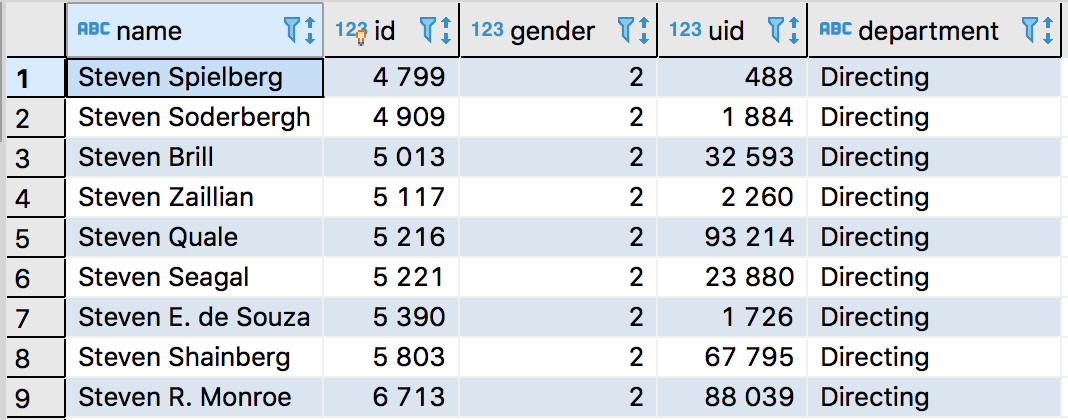

2. The top 3 most popular films.

In [ ]:
SELECT original_title, popularity
FROM movies 
ORDER BY popularity DESC 
LIMIT 3;

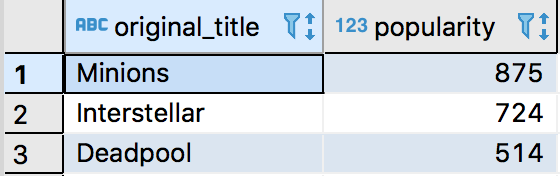

3. All columns of the directors table when the director is a woman.

In [ ]:
SELECT * FROM directors
WHERE gender = "1";

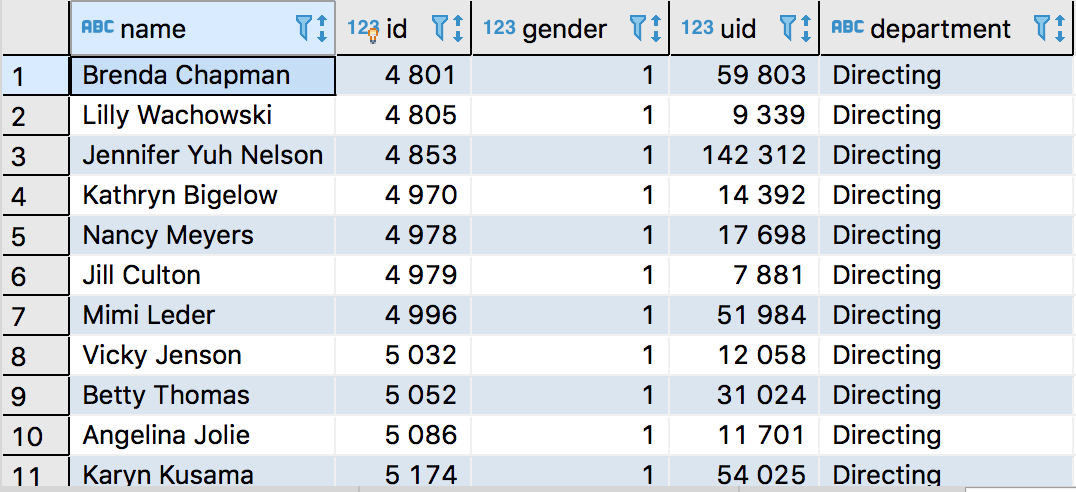

4. The top 10 films directed by Clint Eastwood, with ratings.

In [ ]:
SELECT m.original_title, m.vote_average
FROM directors d
JOIN movies m ON m.director_id = d.id
WHERE d.name LIKE "Clint Eastwood"
ORDER BY m.vote_average DESC
LIMIT 10;

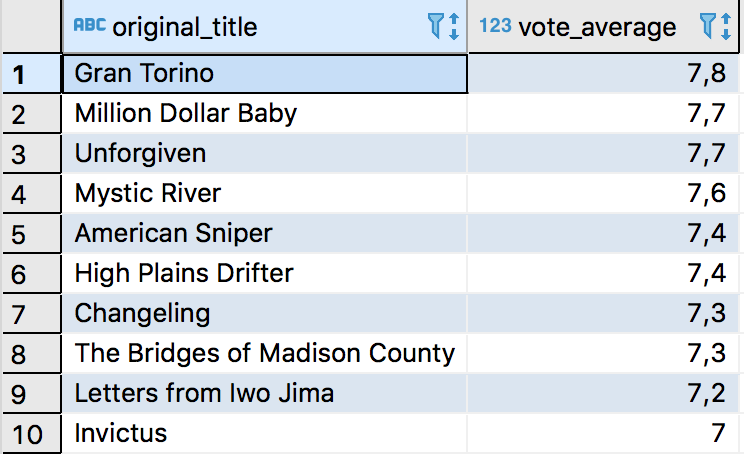

5. If films have the same score, rank them in descending order according to the number of votes.

In [ ]:
SELECT m.original_title, m.vote_average, m.vote_count
FROM directors d
JOIN movies m ON m.director_id = d.id
WHERE d.name LIKE "Clint Eastwood"
ORDER BY m.vote_average DESC , m.vote_count DESC;

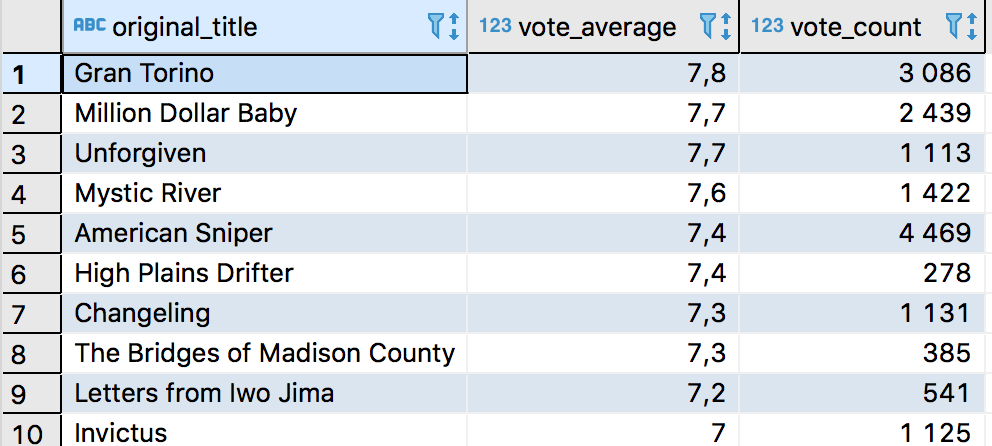

6. Number of films per director.

In [ ]:
SELECT d.name, COUNT(m.original_title) AS movies_per_director
FROM movies as m
JOIN directors as d ON m.director_id = d.id
GROUP BY d.name 
ORDER BY COUNT(m.original_title) DESC;

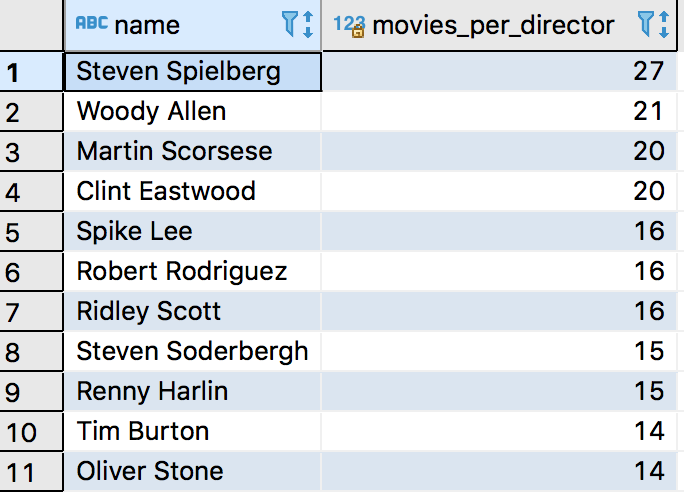

7. The top 10 women directors according to the average score and the number of films.

In [ ]:
SELECT d.name, m.vote_average, COUNT(original_title) AS movie_per_directors 
FROM movies as m
JOIN directors as d ON m.director_id = d.id
WHERE d.gender = '1' 
GROUP BY d.name
ORDER BY vote_average DESC
LIMIT 10;

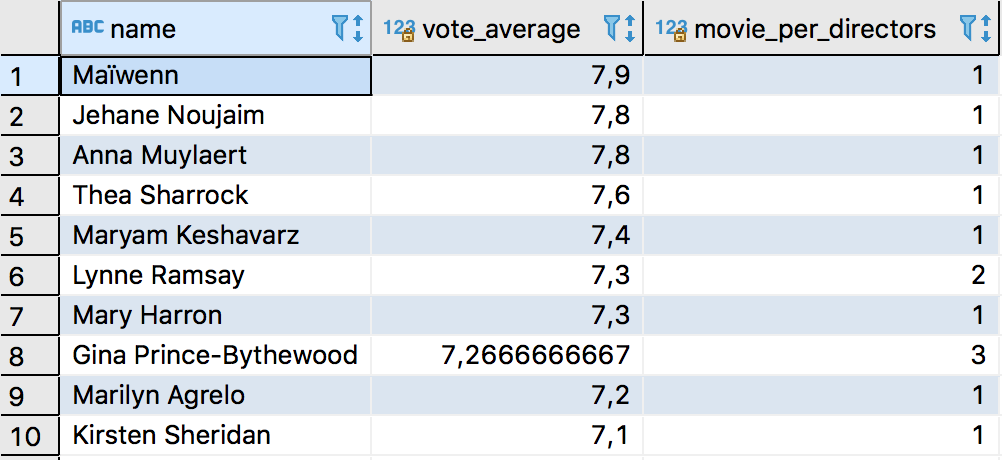

8. The top 5 highest-grossing directors in their careers.

In [ ]:
SELECT SUM(m.revenue) as revenue_totel_movies, d.name
FROM movies as m
JOIN directors as d ON m.director_id = d.id
GROUP BY d.name
ORDER BY revenue_totel_movies DESC 
LIMIT 5;

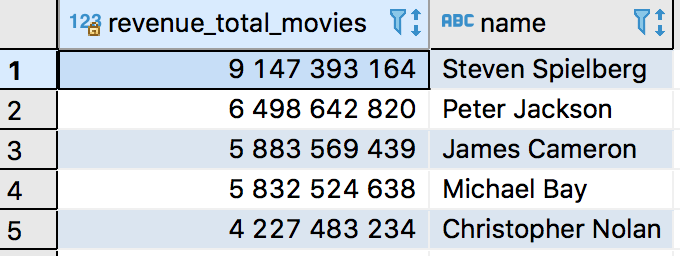

9. The top 5 directors who made a profit during their career.

In [ ]:
SELECT SUM(m.revenue - m.budget) as profits, d.name
FROM movies as m
JOIN directors as d ON m.director_id = d.id
GROUP BY d.name
ORDER BY profits DESC
LIMIT 5;

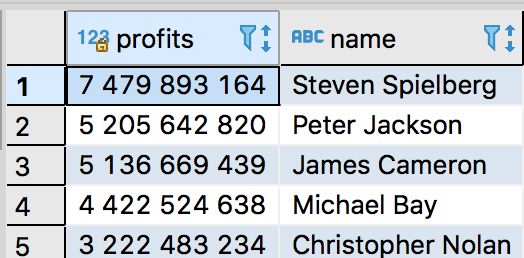

10. The top 10 directors, according to the average_rating.

In [ ]:
SELECT d.name,  m.vote_average AS average_note, COUNT(m.original_title) AS number_of_movies
FROM movies as m
JOIN directors as d ON m.director_id = d.id
GROUP BY d.name
ORDER BY average_note DESC
LIMIT 10;

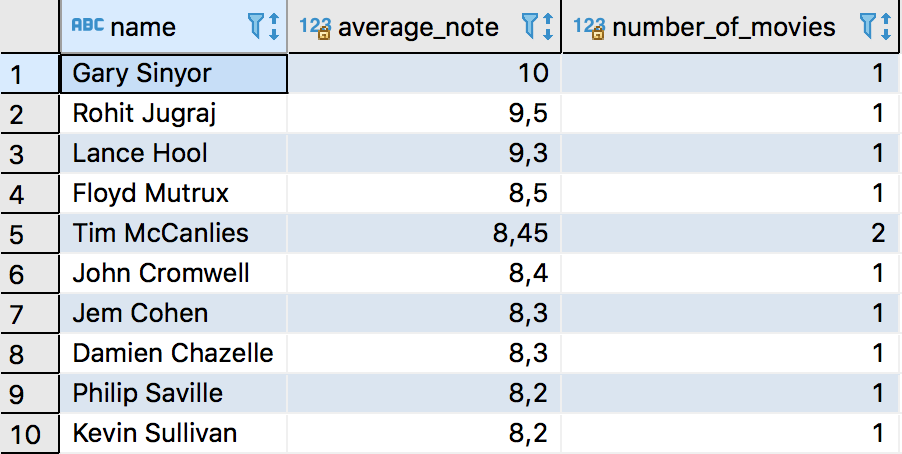

11. The top 10 directors who have made more than 10 films, according to the average_rating.

In [ ]:
SELECT d.name, ROUND(AVG(m.vote_average),2) as average_note, COUNT(original_title) AS number_of_movies 
FROM movies as m
JOIN directors as d ON m.director_id = d.id 
GROUP BY d.name HAVING number_of_movies > 10
ORDER BY average_note DESC
LIMIT 10;

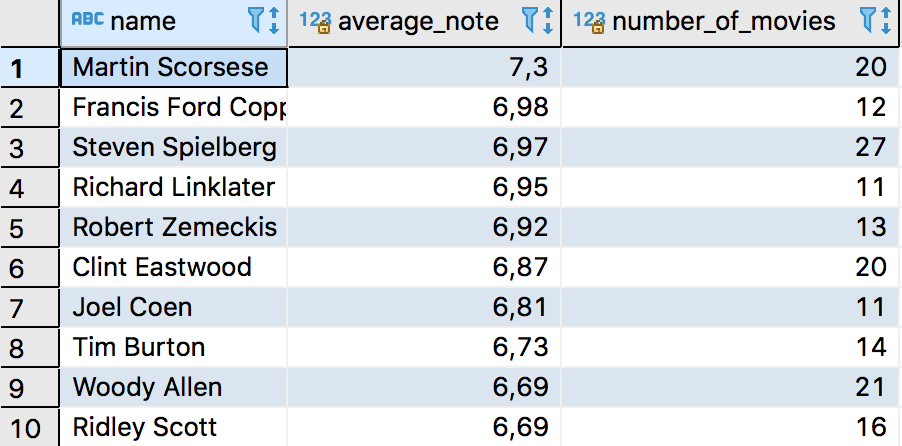

12. The top 10 directors, according to the number of films, considering only the films that have more than 5000 voters.

In [ ]:
SELECT d.name, COUNT(m.original_title) AS number_of_movies  
FROM movies as m
JOIN directors as d ON m.director_id = d.id
WHERE original_title IN (SELECT original_title FROM movies WHERE vote_count > 5000)
GROUP BY d.name
ORDER BY number_of_movies DESC
LIMIT 10;

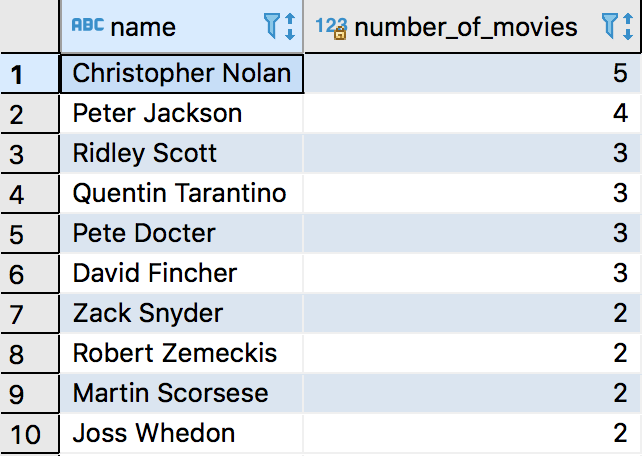

13. The top 10 directors, by number of films, considering only films released between 1980 and 2000.


In [ ]:
SELECT d.name, COUNT(m.original_title) AS number_of_movies, ROUND(AVG(m.vote_average),2) as vote_average
FROM movies as m
JOIN directors as d ON m.director_id = d.id
WHERE original_title IN (SELECT original_title FROM movies WHERE release_date BETWEEN "1980-01-01" AND "1999-12-30")
GROUP BY d.name
ORDER BY number_of_movies DESC
LIMIT 10;


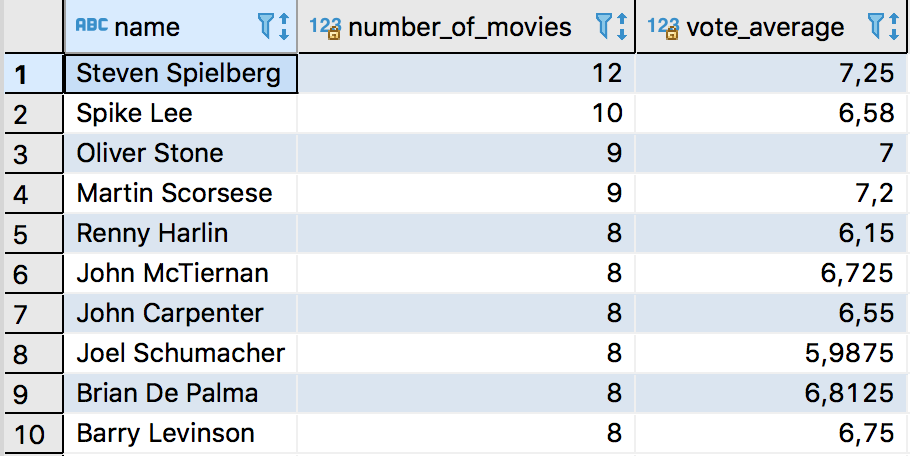

14. The number of films per director, whose popularity is less than 10, and the average score of these films.

In [ ]:
SELECT d.name as directors_name, COUNT(m.original_title) AS number_of_movies, ROUND(AVG(m.vote_average),2) as Average_note
FROM movies as m
JOIN directors as d ON m.director_id = d.id
WHERE original_title IN (SELECT original_title FROM movies WHERE popularity < 10)
GROUP BY d.name
ORDER BY number_of_movies DESC
LIMIT 10;


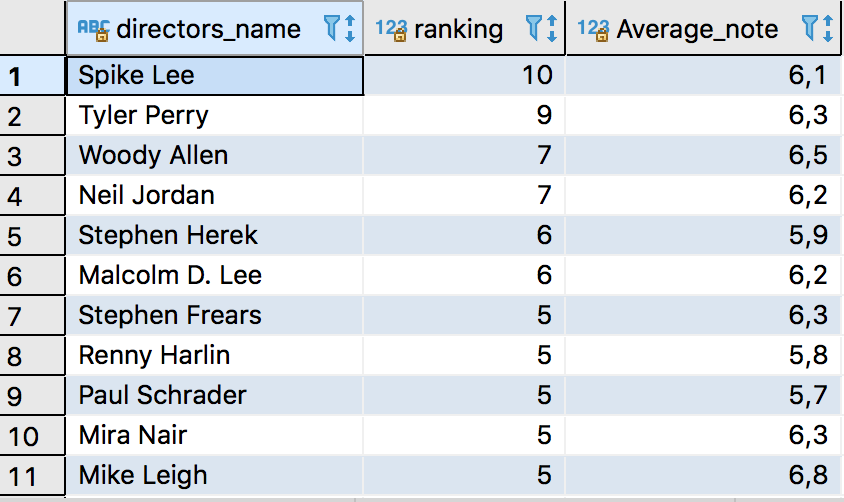

# Window Function

15. For each director, the ranking of films (the top 3) according to the average score, released between 1980 and 2000.

In [ ]:
SELECT *
FROM(
   SELECT d.name, m.original_title, AVG(m.vote_average) as test
          RANK()OVER(PARTITION BY m.original_title ) as Ranking 
   FROM movies as m
   JOIN directors as d ON m.director_id = d.id
   WHERE original_title IN (SELECT original_title FROM movies WHERE release_date BETWEEN "1980-01-01" AND "1999-12-30")
   GROUP BY d.name) 
WHERE Ranking < 3
ORDER BY test DESC;

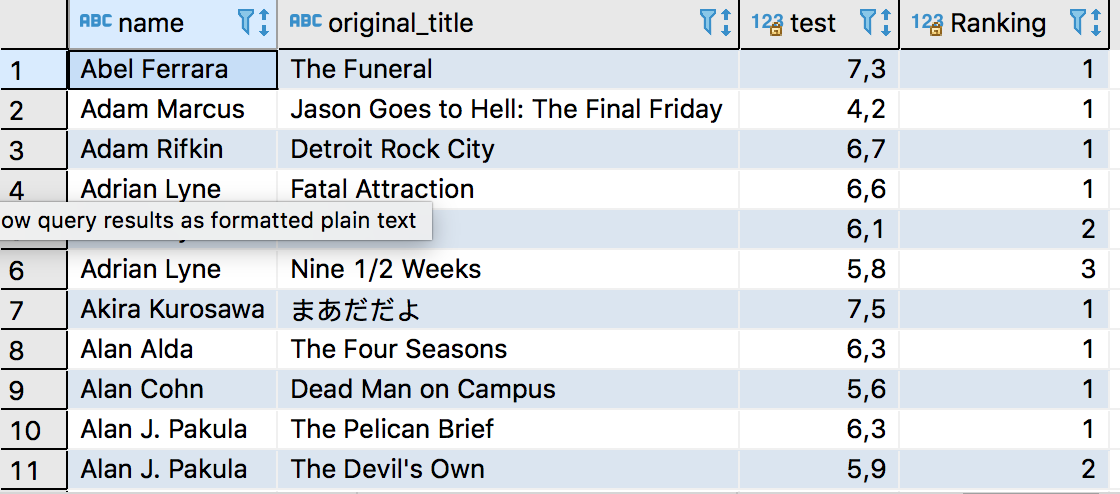

16. The top 3 films with an average score above 8, made after 2000, for each director, according to the average score.

In [ ]:
SELECT d.name as Directors_Name, original_title, vote_average AS test,
RANK() OVER(PARTITION BY d.name ORDER BY vote_average DESC) AS Ranking
FROM directors AS d
JOIN movies AS m ON d.id=m.director_id
WHERE release_date BETWEEN 1980 AND 2000;

SELECT d.name as Directors_Name, original_title, vote_average,
RANK() OVER(PARTITION BY d.name ORDER BY vote_average DESC) AS Ranking
FROM directors AS d
JOIN movies AS m ON d.id=m.director_id
WHERE vote_average>8 and release_date>2000;

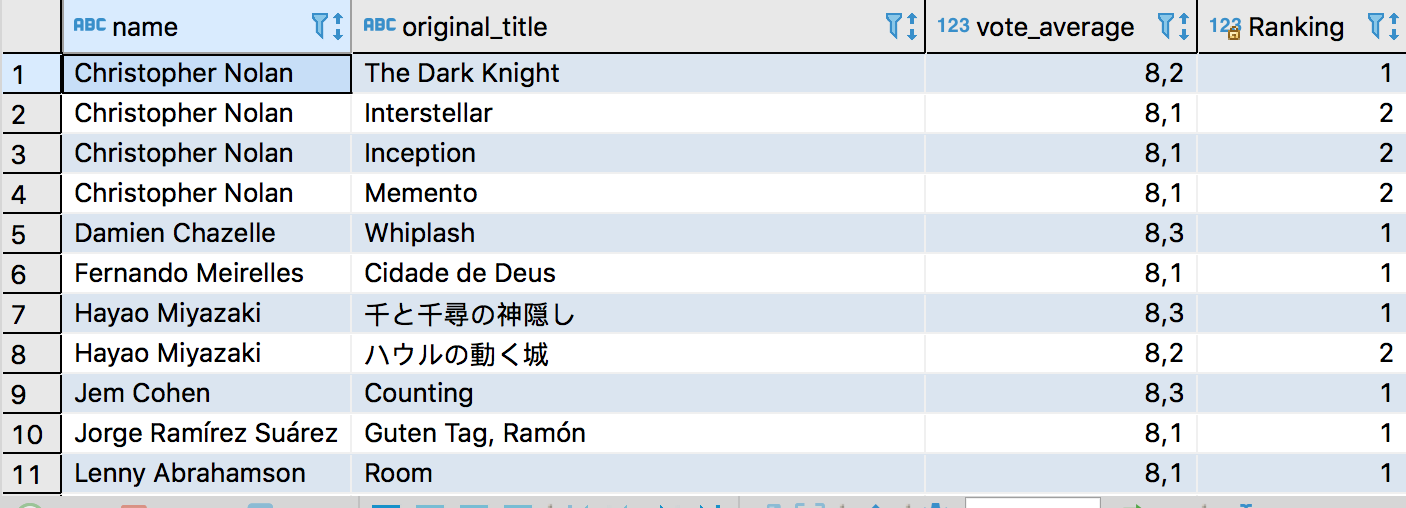